In [8]:
from IPython.display import IFrame
IFrame("./TPL5_SussiniFscundo_V0.9.pdf", width=1000, height=1000)

#### Función de Transferencia Original

H(s) = (15) / (1 s^3 + 6 s^2 + 15 s + 15)


<IPython.core.display.Math object>

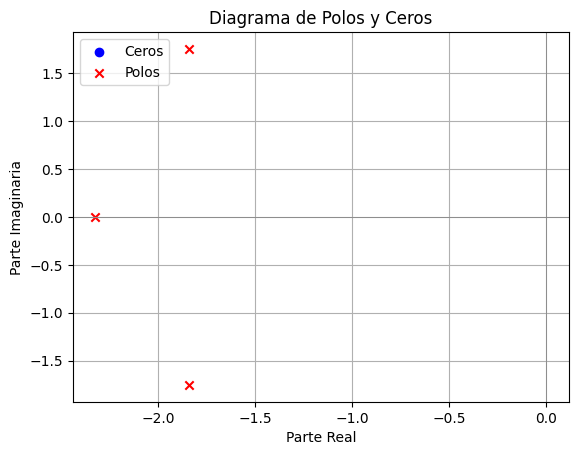

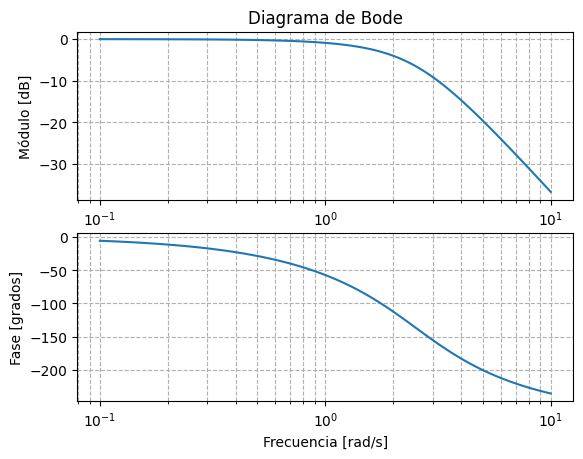

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.general import print_subtitle, print_latex

# ----- COEFICIENTES -----
num = [15]
den = [1, 6, 15, 15]

# ----- MOSTRAR FUNCIÓN ORIGINAL -----
print_subtitle("Función de Transferencia Original")

def poly_to_str(coefs):
    terms = []
    n = len(coefs)
    for i, coef in enumerate(coefs):
        exp = n - i - 1
        if abs(coef) < 1e-12:
            continue
        if exp > 1:
            terms.append(f"{coef:.4g} s^{exp}")
        elif exp == 1:
            terms.append(f"{coef:.4g} s")
        else:
            terms.append(f"{coef:.4g}")
    return " + ".join(terms)

num_str = poly_to_str(num)
den_str = poly_to_str(den)
print(f"H(s) = ({num_str}) / ({den_str})")
print_latex(r"H(s) = \frac{" + num_str + "}{" + den_str + "}")

# ----- CALCULAR CEROS Y POLOS -----
zeros = np.roots(num)
poles = np.roots(den)

# ----- DIAGRAMA DE POLOS Y CEROS -----
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Polos y Ceros')
plt.legend()
plt.grid(True)
plt.show()

# ----- DIAGRAMA DE BODE -----
system = signal.TransferFunction(num, den)
w, mag, phase = signal.bode(system)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.ylabel('Módulo [dB]')
plt.grid(True, which='both', linestyle='--')
plt.title('Diagrama de Bode')

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel('Fase [grados]')
plt.xlabel('Frecuencia [rad/s]')
plt.grid(True, which='both', linestyle='--')

plt.show()
